## <span style="color: Orange;">**Exploratory Data Analysis**</span>
In this section, we focus on understanding the structure of the dataset before proceeding with preprocessing or modeling steps. The primary goal is to identify the most significant features, given that the Wisconsin Breast Cancer Dataset is relatively high-dimensional (30 features, including 10 discriminative features each with 3 variant types).

**Overview of EDA Process**
- [Initial Data Audit and Info](#section-1)
- [Skewness and Kurtosis Analysis](#section-iiskewness-and-kurtosis-analysis)
- [Univariate Analysis](#section-iiiunivariate-analysis)
- [Bivariate Analysis](#section-ivbivariate-analysis)
- [Dimensionality Reduction & Visualization](#section-vdimensionality-reduction-and-class-boundary-visualization)
- [Feature Engineering Ideas](#section-vifeature-engineering-ideas)
- [Feature Selection and Ranking](#section-viifeature-selection--ranking)
- [Finalizing Feature Pools and Findings](#section-viiifinalizing-feature-pools-and-findings)


### <span style="color: Orange;">**Section I: Initial Data Audit and Info**</span>
In this section, we load the configuration files for this notebook and import the Wisconsin Breast Cancer dataset using pandas (CSV format). We then examine basic information about the dataset’s structure and its features. Next, we check for the presence of any missing or null values. Finally, we analyze the distribution of the target labels to detect any class imbalance.

In [39]:
# Importing all of the necessary libraries for the EDA process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

# Loading the configuration files for the notebook
with open("../notebook_config.yaml", 'r') as f:
    config = yaml.safe_load(f)
dataset_path = config['paths']['dataset_path']

In [40]:
# Loading the dataset using a Pandas Dataframe
df = pd.read_csv(dataset_path)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [41]:
# Checking for NULL values and NULL columns if any
print("Null Value / Missing Value Check", end=f"\n{'='*40}\n")
print(df.isnull().value_counts())

# Dropping the "Unnamed: 32", "id" column as they will not contribute to the EDA or modelling process
df = df.drop(columns=['Unnamed: 32', 'id'], axis=1)

Null Value / Missing Value Check
id     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
False  False      False        False         False           False      False            False             False           False                False          False                   False      False       False         False    False          False           False         False              False        False                 False         False          False            False       False             False              False            False       

diagnosis
B    357
M    212
Name: count, dtype: int64


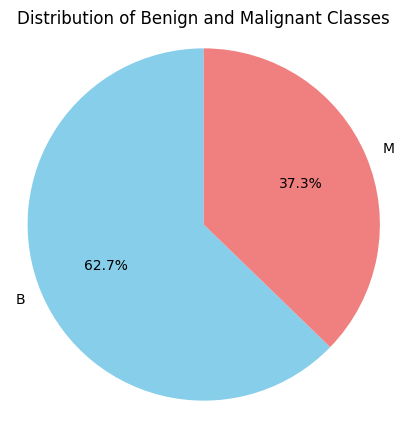

In [42]:
# Visualizing the counts of "Benign" and "Malignant" classes in the dataset
class_counts = df['diagnosis'].value_counts()

print(class_counts)

# Plotting the Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Benign and Malignant Classes')
plt.axis('equal')
plt.show()

### <span style="color: Orange;">Conclusion</span>

- The Breast Cancer Wisconsin Dataset is a well-prepared dataset with a clearly defined structure and a large feature pool suitable for complex modeling techniques. 

- All features, except the target label (diagnosis), are continuous variables, which simplifies the choice and design of modeling approaches. Additionally, the class distribution exhibits only a mild to moderate imbalance. 

- Given the critical nature of predicting malignancy, careful model selection and feature selection will be important. This also motivates exploring appropriate sampling techniques in the preprocessing stage to address any class imbalance effectively.

### <span style="color: Orange;">**Section II: Skewness and Kurtosis Analysis**</span>

In this section, we analyze the skewness and kurtosis of each feature to better understand their distributions.

In [43]:
# Creating a copy of the dataset and splitting as features and target label
bcd = df.copy()
X = bcd.drop(columns=['diagnosis'])
y = bcd['diagnosis']

# Calculating the Skewness and Kurtosis of the features involved
skewness = X.skew().sort_values(ascending=False)
kurtosis = X.kurtosis().sort_values(ascending=False)

# Skewness
print("Skewness in the data")
print(skewness)
print("="*20)

# Kurtosis
print("Kurtosis in the data")
print(kurtosis)
print("*"*20)

Skewness in the data
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0.498321
concave

### <span style="color: Orange;">Conclusion</span>

- Skewness measures the asymmetry of a data distribution, indicating whether values tend to lean left or right of the mean. Kurtosis measures the “tailedness” or peakedness, revealing the presence of outliers or extreme values.

- Our data exhibits significant skewness and kurtosis, reflecting meaningful outliers that are typical in medical datasets such as cancer data. Although these metrics suggest deviation from normality, it is important not to remove outliers blindly, as they carry clinical significance.

- We will further visualize and analyze these patterns to devise an effective modeling strategy that respects the underlying data distribution and its clinical implications.


### <span style="color: Orange;">**Section III: Univariate Analysis**</span>

In this section, we analyze the feature distributions using visualizations to identify useful patterns and reinforce the findings from the previous section. We start by examining histograms to better understand the distribution of each feature. Finally, we conclude this section by detecting outliers through box plots.


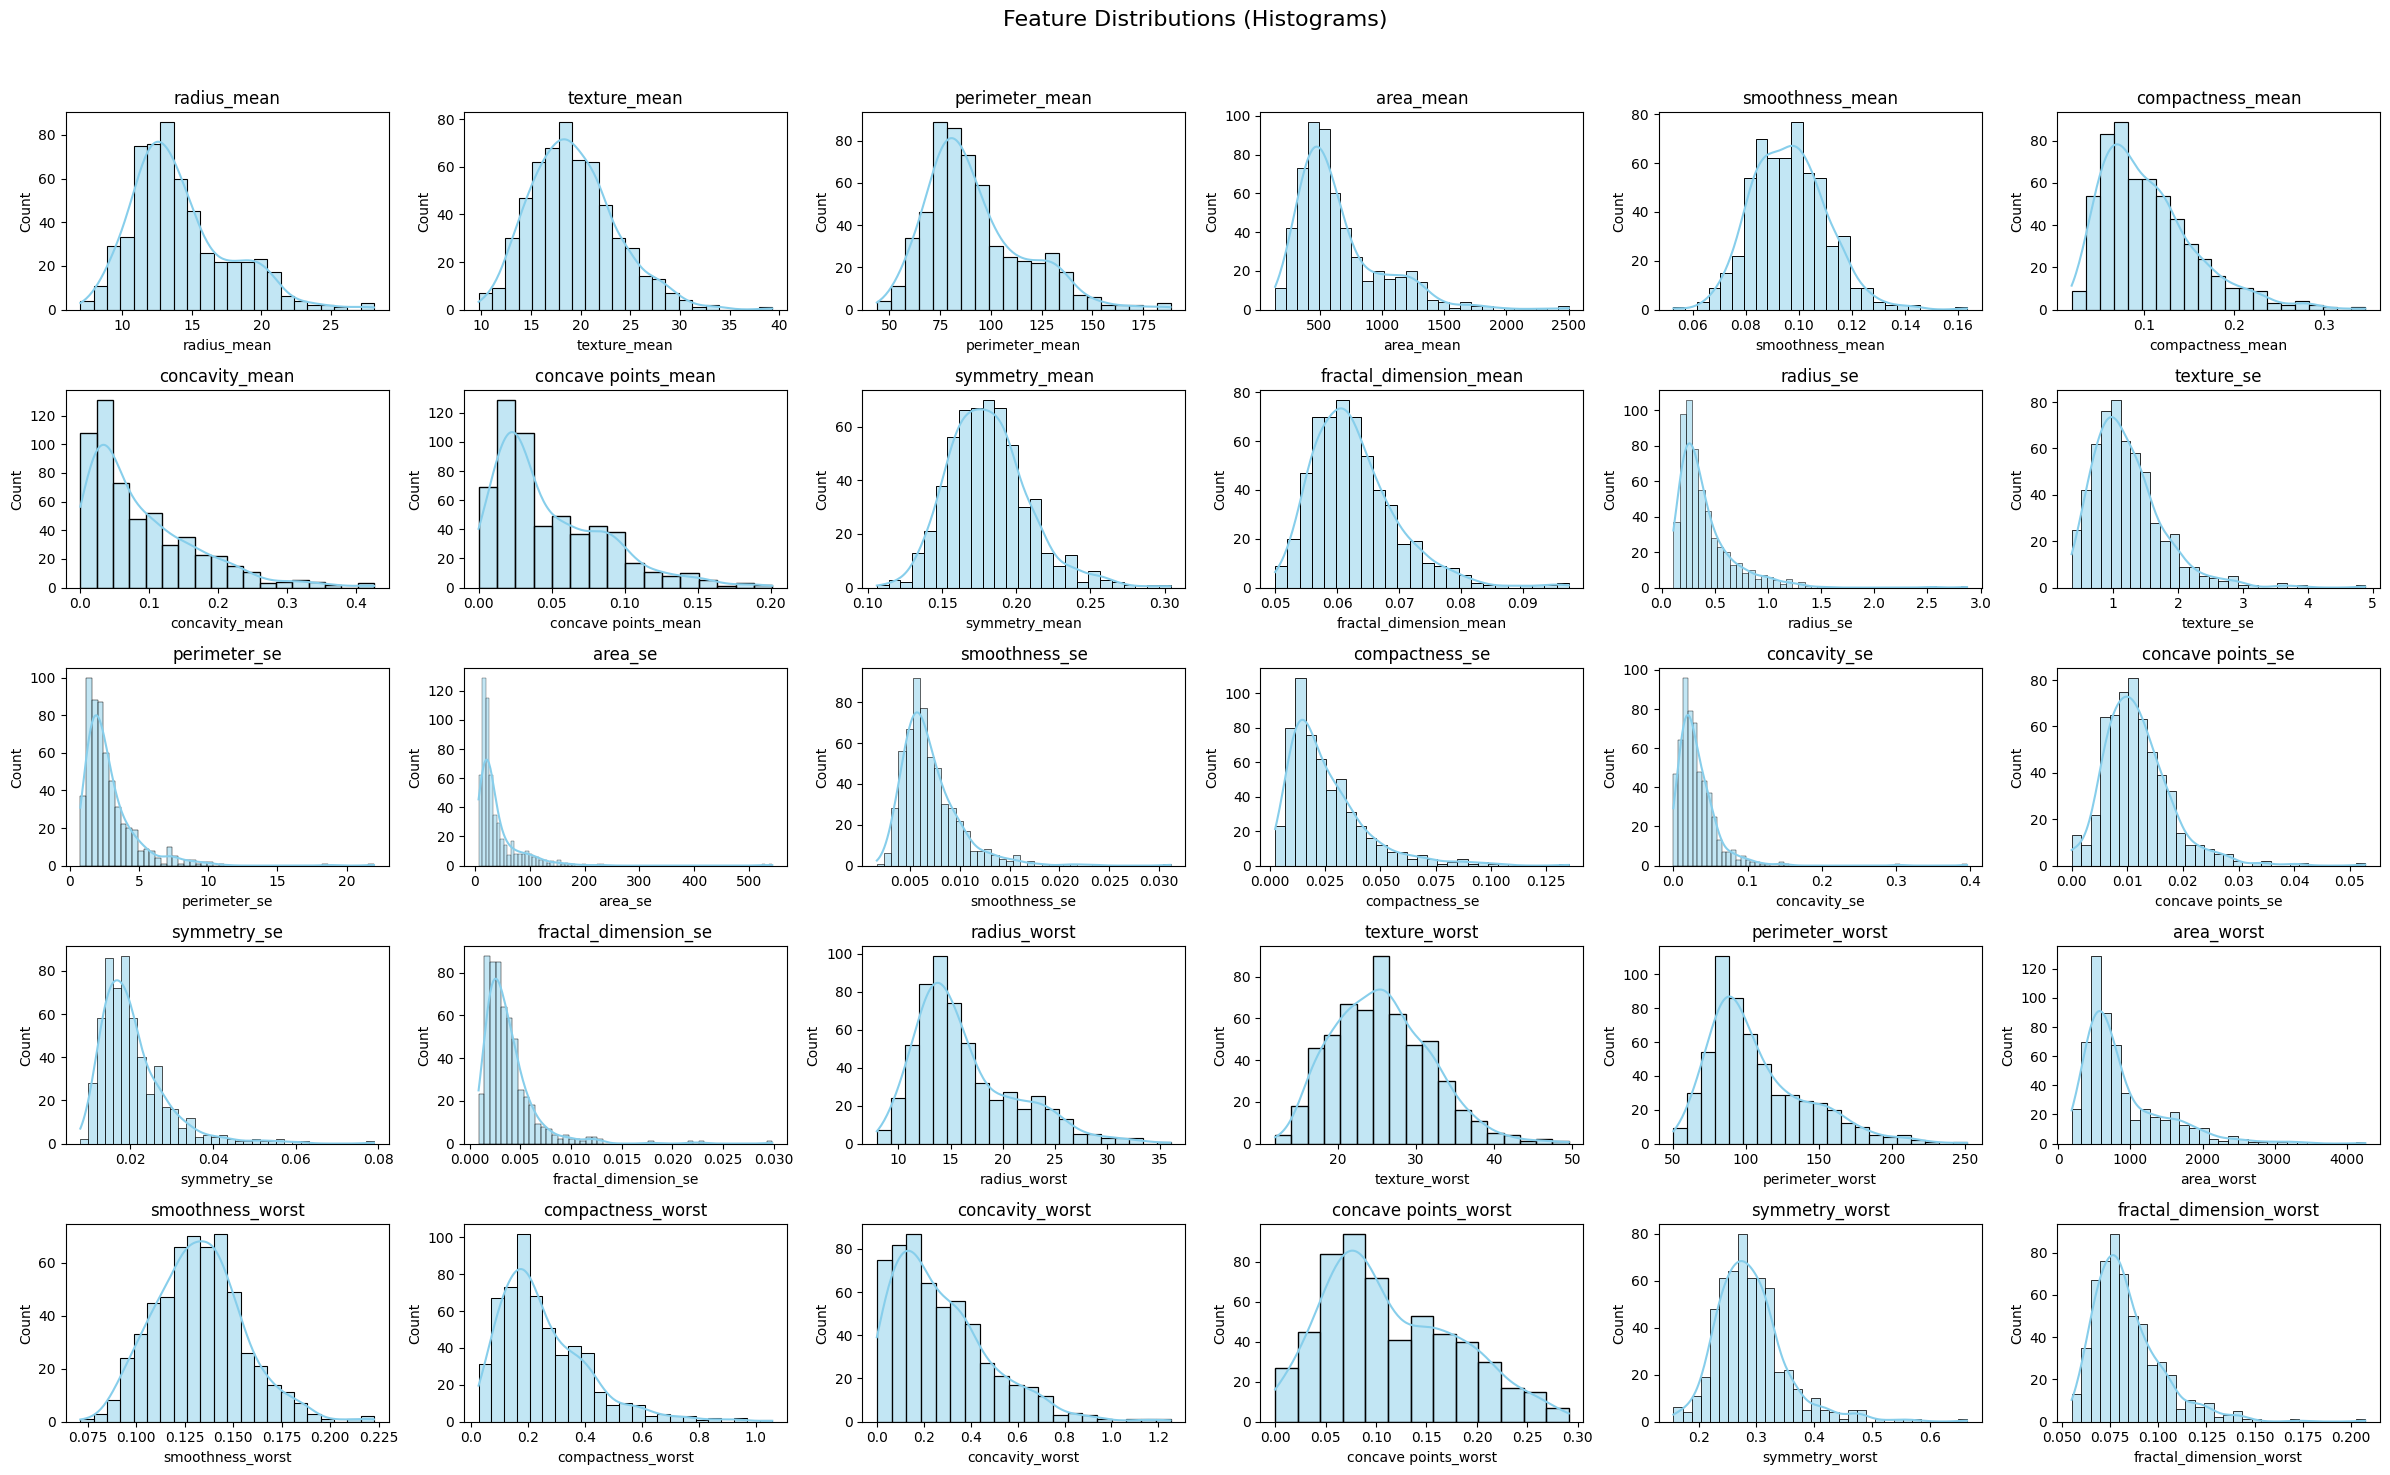

In [44]:
# Histograms for Feature distribution
import math
# Number of features
num_features = X.shape[1]
# Dynamically calculate rows and columns for subplots
cols = 6
rows = math.ceil(num_features / cols)
# Histograms grid
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(X[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.suptitle('Feature Distributions (Histograms)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

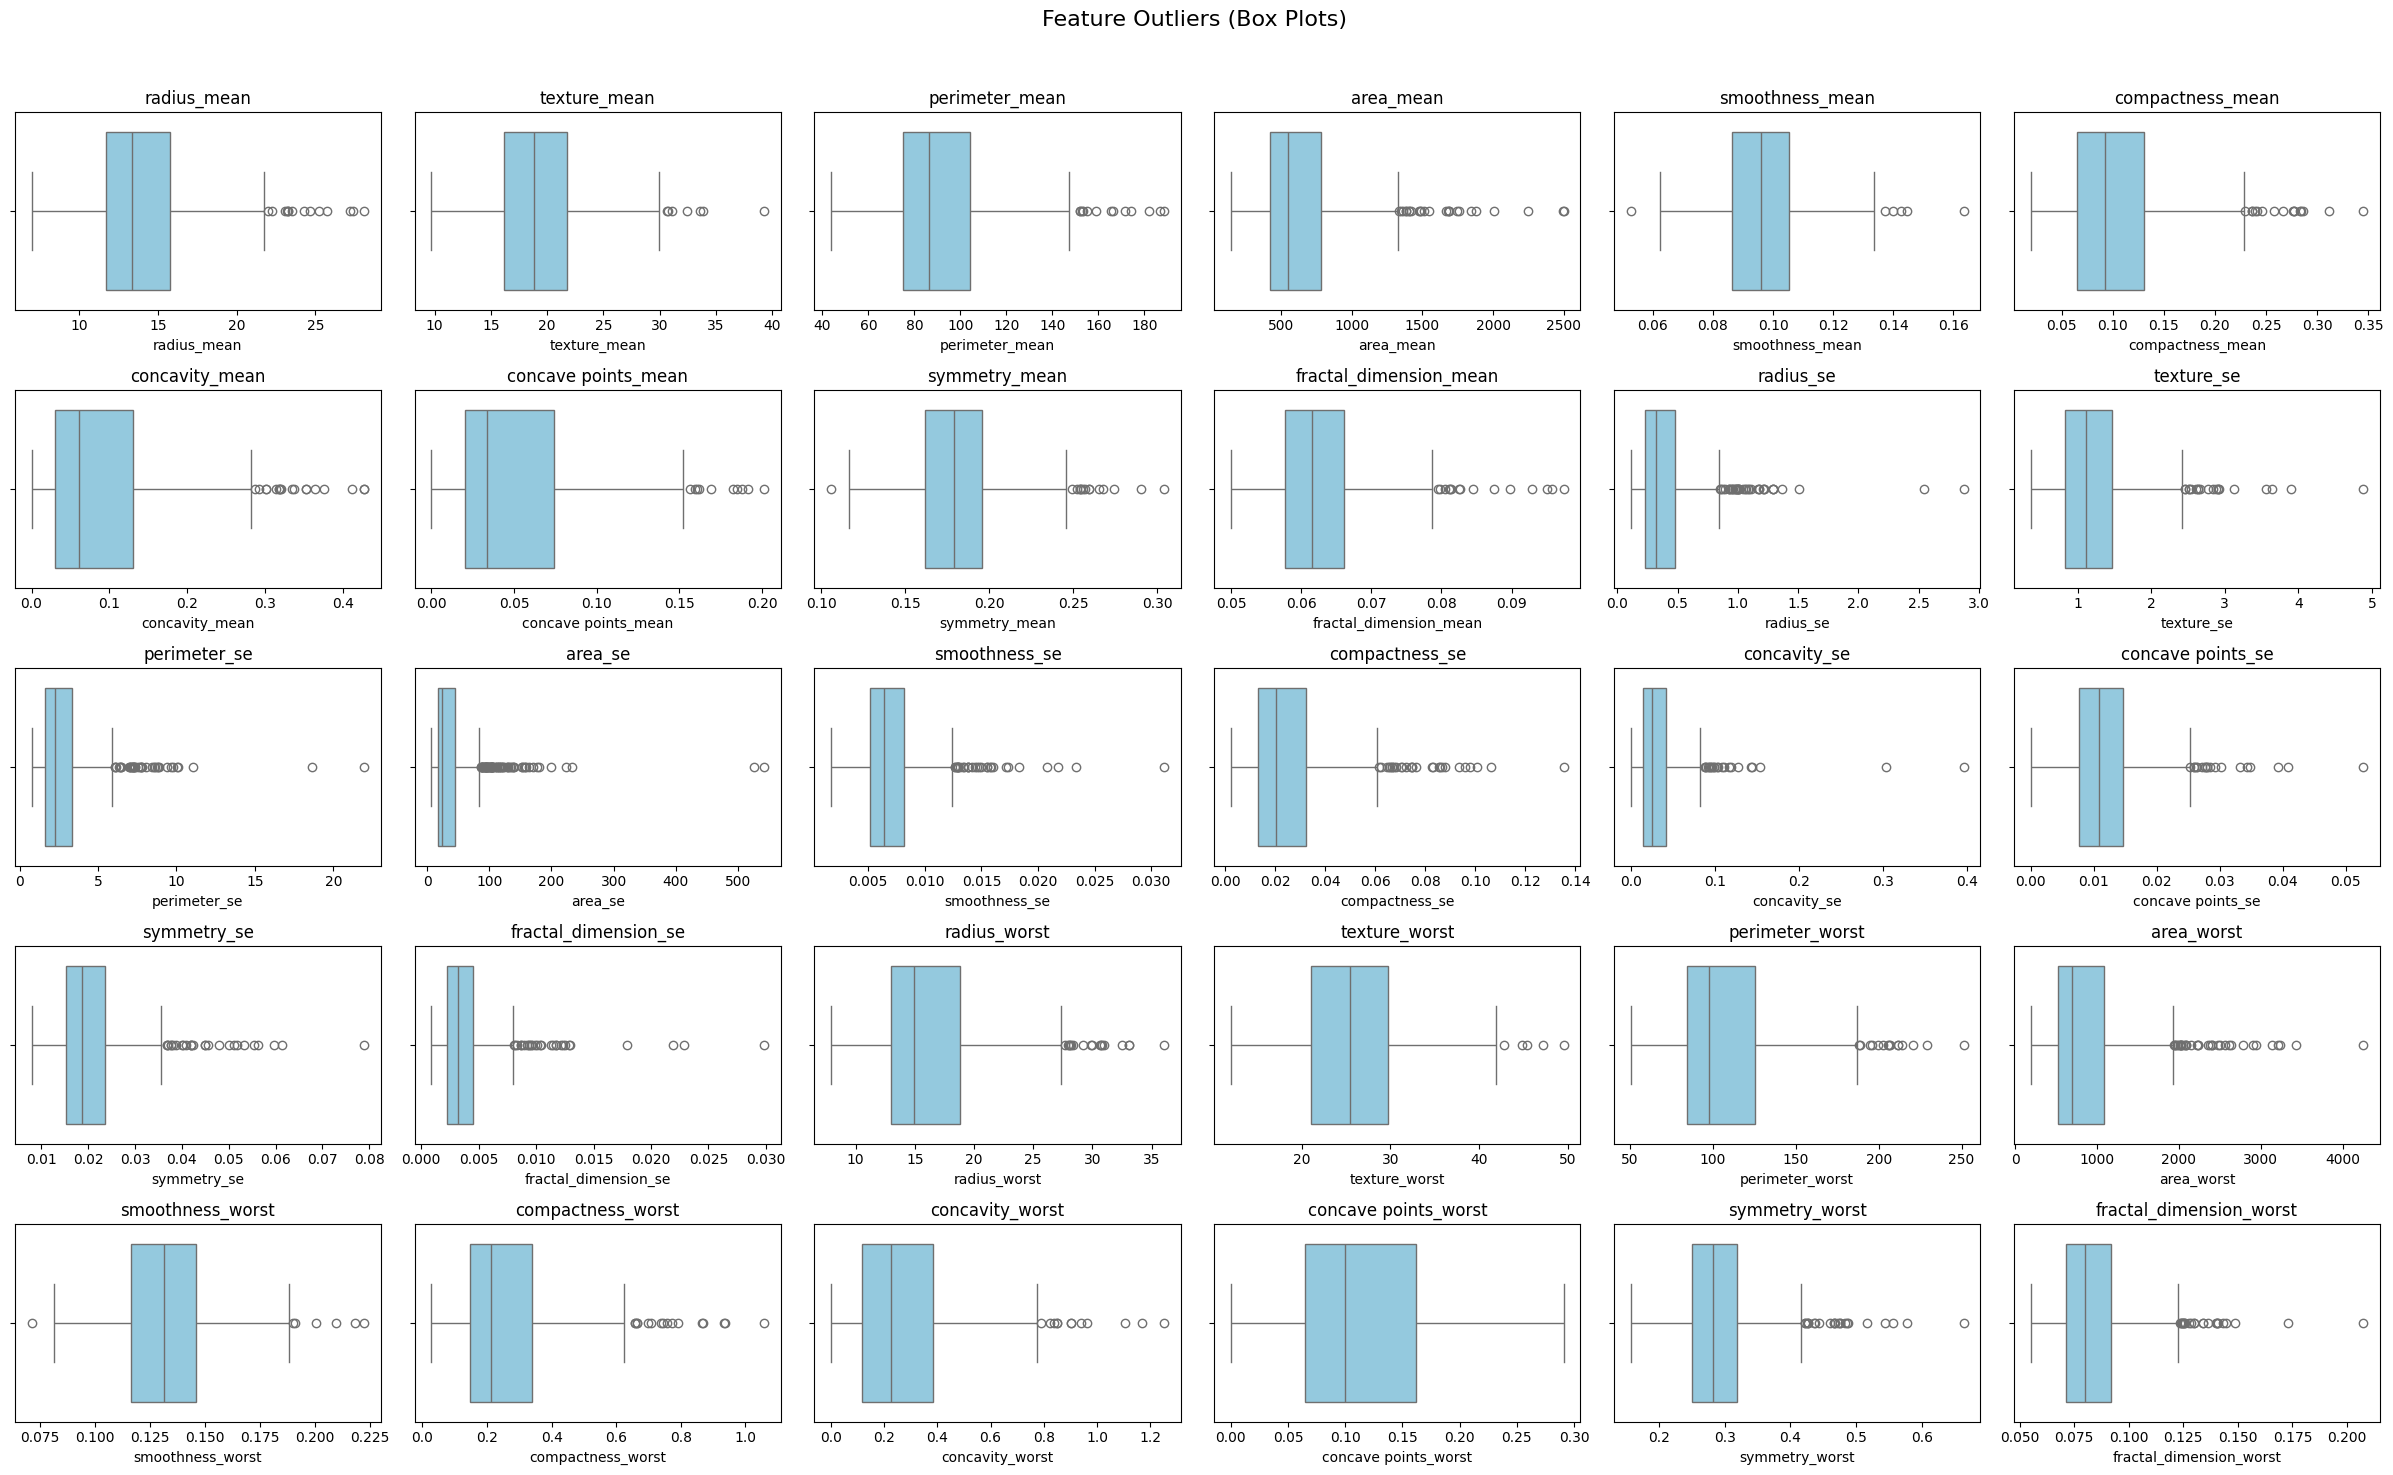

In [45]:
# Box plots for outlier detection
# Box plots grid
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.boxplot(x=X[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.suptitle('Feature Outliers (Box Plots)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### <span style="color: Orange;">Conclusion</span>

- The analysis clearly indicates that the dataset contains a significant number of outliers, which may be meaningful given the nature of tumor malignancy data. The presence of heavy tails suggests that careful handling will be required during preprocessing and modeling. 

- Fortunately, most features exhibit a Gaussian-like distribution with only low to moderate skewness.

### <span style="color: Orange;">**Section IV: Bivariate Analysis**</span>

In this section, we focus on understanding the relationships between variables and between features and the target label to gain insights for feature engineering and selection. 

First, we apply Pearson's correlation to detect multicollinearity and redundancy among features. Then, we use point biserial correlation to identify which features contribute most significantly to the target label.


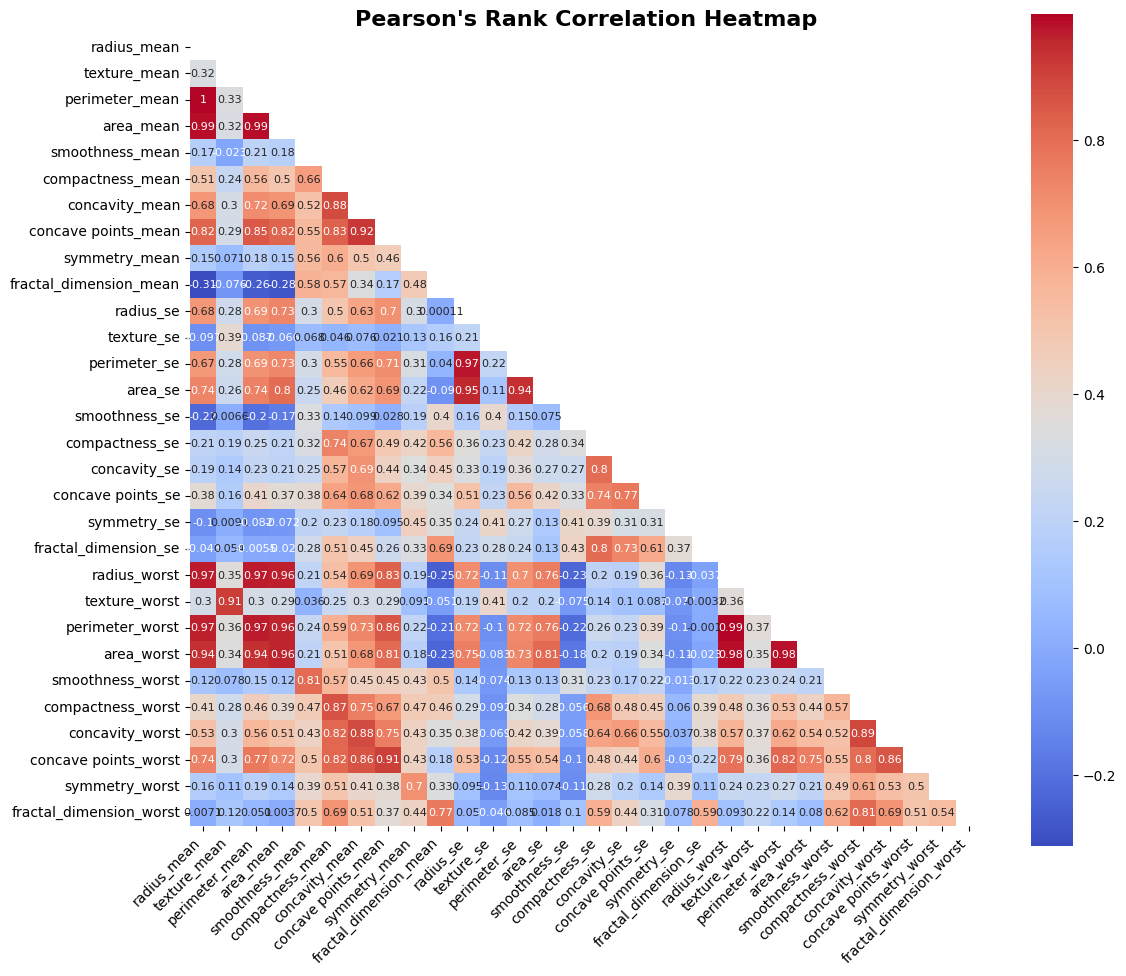

In [46]:
# Pearson's Rank correlation
p_corr = X.corr(method="pearson")

mask = np.triu(np.ones_like(p_corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(p_corr, cmap='coolwarm', annot=True, annot_kws={"size": 8}, square=True, mask=mask)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)  
plt.title("Pearson's Rank Correlation Heatmap", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [47]:
# Point biserial correlation
from scipy.stats import pointbiserialr
y_binary = y.map({'B': 0, 'M': 1})

correlations = {}
p_values = {}

for col in X.columns:
    corr, p_val = pointbiserialr(X[col], y_binary)
    correlations[col] = corr
    p_values[col] = p_val

corr_df = pd.DataFrame({'Correlation': correlations, 'P-Value': p_values})
print(corr_df.sort_values(by='Correlation', ascending=False))

                         Correlation        P-Value
concave points_worst        0.793566  1.969100e-124
perimeter_worst             0.782914  5.771397e-119
concave points_mean         0.776614  7.101150e-116
radius_worst                0.776454  8.482292e-116
perimeter_mean              0.742636  8.436251e-101
area_worst                  0.733825   2.828848e-97
radius_mean                 0.730029   8.465941e-96
area_mean                   0.708984   4.734564e-88
concavity_mean              0.696360   9.966556e-84
concavity_worst             0.659610   2.464664e-72
compactness_mean            0.596534   3.938263e-56
compactness_worst           0.590998   7.069816e-55
radius_se                   0.567134   9.738949e-50
perimeter_se                0.556141   1.651905e-47
area_se                     0.548236   5.895521e-46
texture_worst               0.456903   1.078057e-30
smoothness_worst            0.421465   6.575144e-26
symmetry_worst              0.416294   2.951121e-25
texture_mean

### <span style="color: Orange;">Conclusion</span>

The results clearly indicate significant correlations within two main groups of features:  

- <span style="color: cyan;">Group 1: Area, Perimeter, and Radius</span>
- <span style="color: cyan;">Group 2: Concave Points, Compactness, and Concavity</span>

This collinearity suggests challenges for linear models in classification, emphasizing the importance of careful feature selection. Some features may need to be dropped or combined to create new, more informative features.

Additionally, point biserial correlation reveals that the ‘worst’ variant features are the most significant, which aligns with the biological nature of tumor malignancy.

### <span style="color: Orange;">**Section V: Dimensionality Reduction and Class Boundary Visualization**</span>

In this section, we apply t-SNE for nonlinear dimensionality reduction. This technique preserves local neighborhood structures while condensing the features into a few components, making patterns easier to visualize.

Using t-SNE, we examine how samples cluster, observing whether different classes form distinct groups or overlap. This also helps us assess whether the current features carry sufficient signal to separate the classes effectively.


In [48]:
# TSNE Calculation
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1200, early_exaggeration=20, angle=0.1, init='pca')
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

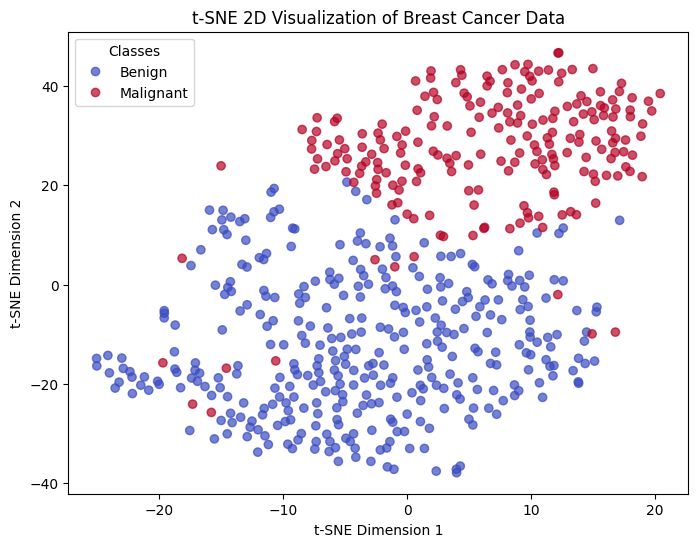

In [49]:
# TSNE Visualization
target = y.map({'B':0, 'M':1}).values  # convert to numeric if needed

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=target, cmap='coolwarm', alpha=0.7)
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Benign', 'Malignant'], title="Classes")
plt.title("t-SNE 2D Visualization of Breast Cancer Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### <span style="color: Orange;">Conclusion</span>

The t-SNE visualization reveals clearly separated clusters corresponding to benign and malignant classes, indicating that the features effectively capture class distinctions. A few malignant samples overlap with benign ones, suggesting borderline cases or subtle feature similarities.

Despite box plots indicating outliers, their absence as extreme points in the t-SNE plot implies these outliers represent genuine variations and meaningful rare cases rather than noise. This supports preserving them during modeling to retain critical clinical information.


### <span style="color: Orange;">**Section VI: Feature Engineering Ideas**</span>

While the current feature set effectively distinguishes between classes, our models may benefit from additional domain-informed engineered features. 

We will augment the existing feature pool with these new features and evaluate their contribution using point biserial correlation. To further validate their impact, we will perform t-SNE on the filtered features that exceed a specified threshold (e.g., 0.5) based on point biserial correlation rankings.


In [50]:
# Some Feature engineering before further analysis
X_c = X.copy()
y_c = y.copy()

X_c['con_worst_per_area'] = X_c['concavity_worst'] / X_c['area_worst']
X_c['con_mean_per_area'] = X_c['concavity_mean'] / X_c['area_mean']

X_c['fd_worst_perimeter'] = X_c['fractal_dimension_worst']*X_c['perimeter_worst']
X_c['fd_mean_perimeter'] = X_c['fractal_dimension_mean']*X_c['perimeter_mean']

X_c['smooth_worst_radius'] = X_c['smoothness_worst']*X_c['radius_worst']
X_c['smooth_worst_radius'] = X_c['smoothness_mean']*X_c['radius_mean']

In [51]:
# Point Biserial Correlation Ranks
y_binary_eng = y_c.map({'B': 0, 'M': 1})
correlations = {}
p_values = {}
for col in X_c.columns:
    corr, p_val = pointbiserialr(X_c[col], y_binary_eng)
    correlations[col] = corr
    p_values[col] = p_val
eng_corr_df = pd.DataFrame({'Correlation': correlations, 'P-Value': p_values})
print(eng_corr_df.sort_values(by='Correlation', ascending=False))

                         Correlation        P-Value
concave points_worst        0.793566  1.969100e-124
perimeter_worst             0.782914  5.771397e-119
concave points_mean         0.776614  7.101150e-116
radius_worst                0.776454  8.482292e-116
fd_worst_perimeter          0.768996  2.853425e-112
smooth_worst_radius         0.749640  1.043846e-103
fd_mean_perimeter           0.745731  4.496630e-102
perimeter_mean              0.742636  8.436251e-101
area_worst                  0.733825   2.828848e-97
radius_mean                 0.730029   8.465941e-96
area_mean                   0.708984   4.734564e-88
concavity_mean              0.696360   9.966556e-84
concavity_worst             0.659610   2.464664e-72
compactness_mean            0.596534   3.938263e-56
compactness_worst           0.590998   7.069816e-55
radius_se                   0.567134   9.738949e-50
perimeter_se                0.556141   1.651905e-47
area_se                     0.548236   5.895521e-46
texture_wors

In [52]:
# Separating point biserial correlation ranks for Raw vs Raw + Engineered Features for downstream processing

threshold = 0.25
# Now we have the initial pool of features one where engineered features are present and the other where they are not present
filtered_eng_corr_df = eng_corr_df[eng_corr_df['Correlation'].abs() >= threshold]
filtered_corr_df = corr_df[corr_df['Correlation'].abs() >= threshold]

# Save as column names for ease of use
init_eng_feature_pool = filtered_eng_corr_df.index.to_list()
init_feature_pool = filtered_corr_df.index.to_list()

### <span style="color: Orange;">Conclusion</span>

The point biserial correlation indicates that the newly engineered features are significant. However, we can further strengthen our analysis through downstream processing to select features more efficiently, reducing dimensionality while maintaining or even improving class representation.

### <span style="color: Orange;">**Section VII: Feature Selection & Ranking**</span>

In this section, we apply a two-tier technique to efficiently select the most important and highest-ranking features from the feature pools using mRMR followed by a Random Forest approach. 

We will then use t-SNE on these selected feature sets to evaluate whether the feature representation and class separability are maintained in both cases.

In [53]:
# mRMR test
import pymrmr

y_numeric = y.map({'B': 0, 'M': 1})

# For engineered pool
X_eng = X_c[init_eng_feature_pool]
df_eng = pd.concat([y_numeric, X_eng], axis=1)
df_eng.columns = ['target'] + list(X_eng.columns)

# For raw pool
X_raw = X[init_feature_pool]
df_raw = pd.concat([y_numeric, X_raw], axis=1)
df_raw.columns = ['target'] + list(X_raw.columns)

top_k = 25
# For engineered pool
mrmr_eng_feats = pymrmr.mRMR(df_eng, 'MIQ', top_k)
# For raw pool
mrmr_raw_feats = pymrmr.mRMR(df_raw, 'MIQ', top_k)

In [54]:
# Running through a Random Forest Classifier for final feature rank
from sklearn.ensemble import RandomForestClassifier

def run_rf_importance(X, y, n_select=15):
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    importances = pd.Series(clf.feature_importances_, index=X.columns)
    top_feats = importances.sort_values(ascending=False).head(n_select).index.tolist()
    return top_feats

X_eng_mrmr = X_c[mrmr_eng_feats]
X_raw_mrmr = X[mrmr_raw_feats]

top20_eng_feats_rf = run_rf_importance(X_eng_mrmr, y_numeric, n_select=20)
top20_raw_feats_rf = run_rf_importance(X_raw_mrmr, y_numeric, n_select=20)

print("Top 20 Engineered Pool Features (Random Forest):", top20_eng_feats_rf)
print("Top 20 Raw Pool Features (Random Forest):", top20_raw_feats_rf)

print(len(top20_eng_feats_rf))
print(len(top20_raw_feats_rf))

Top 20 Engineered Pool Features (Random Forest): ['fd_worst_perimeter', 'smooth_worst_radius', 'perimeter_worst', 'concave points_worst', 'radius_worst', 'area_worst', 'fd_mean_perimeter', 'radius_mean', 'concavity_mean', 'perimeter_mean', 'area_se', 'area_mean', 'texture_worst', 'texture_mean', 'concavity_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'radius_se']
Top 20 Raw Pool Features (Random Forest): ['perimeter_worst', 'concave points_worst', 'radius_worst', 'concave points_mean', 'area_worst', 'concavity_mean', 'perimeter_mean', 'area_se', 'area_mean', 'radius_se', 'concavity_worst', 'radius_mean', 'texture_worst', 'compactness_worst', 'perimeter_se', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'smoothness_mean', 'concavity_se']
20
20


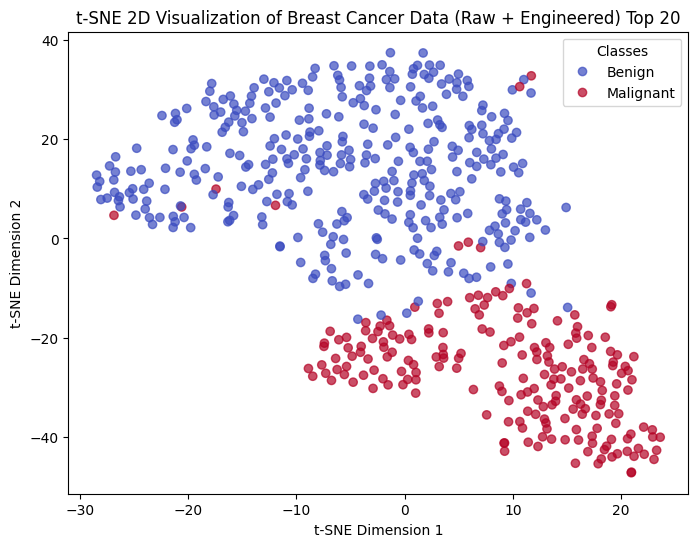

In [55]:
# Visualizing t-SNE for Raw + Engineered Feature Set
X_eng_filtered = X_c[top20_eng_feats_rf]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_eng_filtered)

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1200, early_exaggeration=20, angle=0.1, init='pca')
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

# TSNE Visualization
target = y_c.map({'B':0, 'M':1}).values  # convert to numeric if needed

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=target, cmap='coolwarm', alpha=0.7)
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Benign', 'Malignant'], title="Classes")
plt.title(f"t-SNE 2D Visualization of Breast Cancer Data (Raw + Engineered) Top {len(top20_eng_feats_rf)}")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

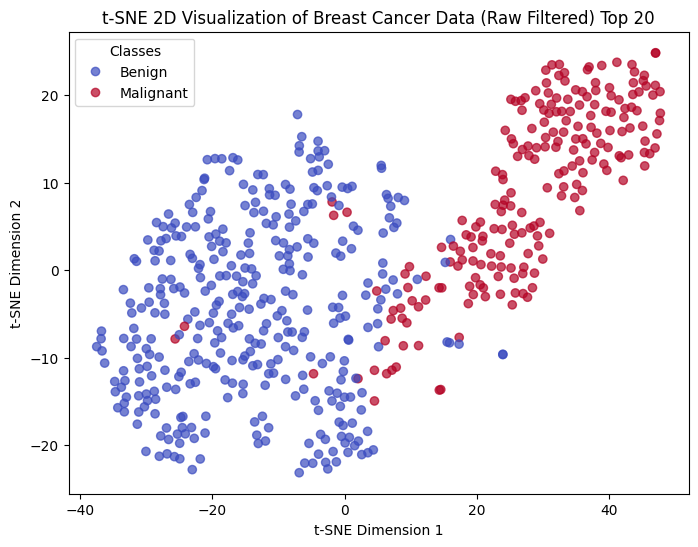

In [56]:
# Visualizing t-SNE for Raw Feature Set (Filtered by PBC ranks)
X_filtered = X[top20_raw_feats_rf]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1200, early_exaggeration=20, angle=0.1, init='pca')
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

# TSNE Visualization
target = y.map({'B':0, 'M':1}).values  # convert to numeric if needed

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=target, cmap='coolwarm', alpha=0.7)
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Benign', 'Malignant'], title="Classes")
plt.title(f"t-SNE 2D Visualization of Breast Cancer Data (Raw Filtered) Top {len(top20_raw_feats_rf)}")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### <span style="color: Orange;">Conclusion</span>

Having successfully demonstrated that both lower-dimensional feature sets maintain comparable class separation, we can now proceed to the preprocessing step to efficiently utilize these feature sets in a modeling pipeline.

### <span style="color: Orange;">**Section VIII: Finalizing Feature Pools and Findings**</span>

We have successfully completed the EDA process and uncovered several important insights:

- The Breast Cancer dataset exhibits low to moderate class imbalance, which is not expected to significantly impact modeling.  
- Significant skewness and outliers are present in feature distributions; however, these outliers represent genuine and important information. Careful preprocessing is required to preserve their value.  
- Many features are highly correlated, indicating that linear modeling may be challenging. Our two-tier feature selection strategy helps mitigate this by reducing redundancy.  
- The t-SNE analysis demonstrated clear class separation when comparing all 30 features to the filtered features obtained from our two-tier selection.  
- We effectively reduced dimensionality by nearly half while maintaining distinct class separation, enabling us to apply varied modeling techniques, with SVM being a natural candidate to explore.  

Moving forward, we will save these selected feature sets and focus on preprocessing strategies tailored to each set. This will include building pipelines specific to the feature pools and exploring suitable modeling approaches and requirements for both cases.


In [57]:
import pickle

with open('../features/top20_eng_feats_rf.pkl', 'wb') as f:
    pickle.dump(top20_eng_feats_rf, f)

# Save raw features
with open('../features/top20_raw_feats_rf.pkl', 'wb') as f:
    pickle.dump(top20_raw_feats_rf, f)